# Automatic sleep staging

This notebook demonstrates how to perform automatic sleep staging of polysomnography data in YASA.

Please make sure to install the latest version of YASA first with: `pip install --upgrade yasa`

In [1]:
import mne
import yasa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's load a nap recording, directly as an MNE RAw object
raw = mne.io.read_raw_fif('sub-02_mne_raw.fif', preload=True, verbose=False)
print('The channels are:', raw.ch_names)
print('The sampling frequency is:', raw.info['sfreq'])
raw

The channels are: ['F3', 'F4', 'C3', 'C4', 'O1', 'O2', 'EOG1', 'EOG2', 'EMG1']
The sampling frequency is: 100.0


<Raw | sub-02_mne_raw.fif, 9 x 294000 (2940.0 s), ~20.2 MB, data loaded>

In [3]:
# Let's load the human-scored hypnogram
hypno = np.loadtxt('sub-02_hypno_30s.txt', dtype=str)
hypno

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N1', 'W', 'W', 'W',
       'W', 'N1', 'N1', 'N1', 'W', 'W', 'N1', 'N1', 'N1', 'N1', 'N2',
       'N2', 'N2', 'W', 'N1', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'W',
       'W', 'W', 'W', 'W', 'W', 'W'], dtype='<U2')

In [4]:
# Detect sleep stages automatically with YASA
sls = yasa.SleepStaging(raw, eeg_name="C4", eog_name="EOG1", emg_name="EMG1", 
                        metadata=dict(age=21, male=False))
y_pred = sls.predict()
y_pred

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'N2', 'N2', 'W', 'N2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'N1', 'N2', 'W', 'N1', 'N1', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'W', 'N3', 'W', 'W', 'W'], dtype=object)

In [5]:
# What is the accuracy of the prediction
accuracy = (hypno == y_pred).sum() / y_pred.size
print("The overall acccuracy is %.3f" % accuracy)

The overall acccuracy is 0.827


In [6]:
# What features were used to predict the sleep stages?
sls.get_features()

,age,eeg_abspow,eeg_abspow_c5min_norm,eeg_abspow_p5min_norm,eeg_alpha,eeg_alpha_c5min_norm,eeg_alpha_p5min_norm,eeg_at,eeg_at_c5min_norm,eeg_at_p5min_norm,...,eog_skew_p5min_norm,eog_std,eog_std_c5min_norm,eog_std_p5min_norm,eog_theta,eog_theta_c5min_norm,eog_theta_p5min_norm,male,time_hour,time_norm
epoch,,,,,,,,,,,,,,,,,,,,,
0,21,100.247910,-0.041413,-0.024646,0.236086,0.604378,0.240434,1.405012,0.522676,0.202314,...,1.171862,134.437943,0.216312,0.691142,0.081977,-0.074230,-0.640612,0,0.000000,0.000000
1,21,108.543259,-0.045156,-0.014074,0.347460,0.648893,0.398689,1.912515,0.561466,0.326951,...,0.260619,146.729355,0.161536,0.737389,0.092321,0.052545,-0.606164,0,0.008333,0.010309
2,21,72.832497,-0.051280,-0.040892,0.437710,0.686650,0.536934,2.127875,0.594603,0.403757,...,0.050218,22.892521,0.088556,0.442176,0.281039,0.195751,-0.175687,0,0.016667,0.020619
3,21,56.865452,-0.052860,-0.064476,0.484872,0.690952,0.639564,3.075238,0.605472,0.558490,...,-0.025893,16.387251,0.044882,0.282331,0.239596,0.255528,-0.029458,0,0.025000,0.030928
4,21,85.295044,-0.051662,-0.064133,0.409847,0.685435,0.658500,2.107204,0.597074,0.556235,...,-0.348340,28.505169,0.018754,0.204662,0.197594,0.290903,0.002328,0,0.033333,0.041237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,21,440.743073,1.058702,0.944863,0.228467,0.058966,-0.184093,1.594040,0.150163,-0.147576,...,0.148784,641.862915,1.154029,1.246315,0.102107,-0.264155,-0.506652,0,0.775000,0.958763
94,21,2724.819824,1.141853,1.575679,0.073764,0.098203,-0.175800,0.751290,0.210331,-0.133397,...,0.135705,83.422211,0.985413,1.277002,0.076254,-0.232253,-0.499989,0,0.783333,0.969072
95,21,220.032669,1.048877,1.575540,0.377125,0.149825,-0.081645,2.704999,0.284076,-0.021904,...,0.395781,74.588257,0.807452,1.302558,0.238056,-0.178721,-0.388549,0,0.791667,0.979381


In [7]:
# What are the predicted probabilities of each sleep stage at each epoch?
sls.predict_proba()

,N1,N2,N3,R,W
epoch,,,,,
0,0.019392,0.033505,0.001639,0.005495,0.939969
1,0.075906,0.040468,0.001974,0.012812,0.868840
2,0.012592,0.005998,0.000151,0.002452,0.978806
3,0.011069,0.006643,0.000039,0.001884,0.980364
4,0.011321,0.028442,0.000220,0.002674,0.957343
...,...,...,...,...,...
93,0.028755,0.078150,0.263581,0.010250,0.619264
94,0.018776,0.093083,0.575573,0.010271,0.302296
95,0.029719,0.036139,0.007347,0.005370,0.921425


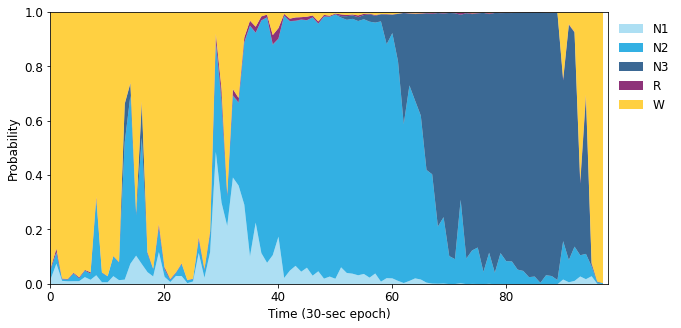

In [8]:
# Same but with a plot
sls.plot_predict_proba();

In [9]:
# Using just an EEG channel
y_pred = yasa.SleepStaging(raw, eeg_name="C4").predict()
y_pred

array(['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'N2', 'W', 'N2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'N1', 'N1', 'W', 'N1', 'N1', 'N1', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N3',
       'N2', 'N2', 'N3', 'N2', 'N2', 'N3', 'N2', 'N3', 'N2', 'N2', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'W', 'W', 'W'], dtype=object)